> The equations are as follows

<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + A - (B+1)u + u^2v$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + Bu - u^2 v$</center></h3>

With parameters  :
- $D_u = 0.0016, \quad D_v=0.0131$.
- $A = 4.5$.
- $B = 6.96$.

In [81]:
%config Completer.use_jedi = False
import numpy as np
import numba
import sys
sys.path.append("/end/home/rh2310/morpho_repo/turing_codebase")
from solvers.explicit_Euler import integrate
from solvers.turing_models import Brusselator

from matplotlib import pyplot as plt

In [79]:
n = (32, 32)
L = (0.4, 0.4)


delta_max = 3-2*np.sqrt(2)
factor = 1
D_v = 1
D_u = delta_max * D_v * factor
delta = D_u/D_v

print(f"Delta max   :{delta_max}")
print(f"Delta factor:{factor}")
print(f"Delta       :{delta}")
print()
A = 4.0
print(f"Max B Factor: {(1+A**2)/((1 + np.sqrt(delta) * A)**2)}")
print(f"Max B       : {(1+A**2)}")
print(f"Min B Factor: 1")
print(f"Min B       : {((1 + np.sqrt(delta) * A)**2)}")
B_factor = 9.051093734508601
B = ((1 + np.sqrt(delta) * A)**2) * B_factor
print(f"B factor    : {B_factor}")
print(f"B           : {B}")
Ds = np.array([D_u, D_v])


c0 = np.random.normal(scale=.1, size=(2, n[0], n[1]))
c0[0, :,:] += A
c0[1, :,:] += B/A
#c0 = data[:, :, :, 0]

f_args = (A, B)
t = np.linspace(0, 200, 256)

dt = 0.001

sol = integrate(c0, t, dt, n, L, Ds, Brusselator, f_args)

Delta max   :0.1715728752538097
Delta factor:1
Delta       :0.1715728752538097

Max B Factor: 2.4083159422461695
Max B       : 17.0
Min B Factor: 1
Min B       : 7.058874503045714
B factor    : 9.051093734508601
B           : 63.89053478719958


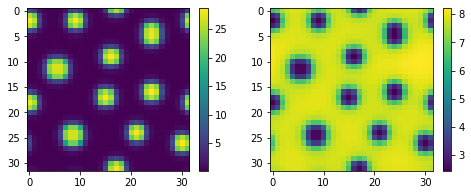

In [80]:
index = -1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(sol[0,:,:, index])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, index])
plt.colorbar(shrink=.75)
plt.show()

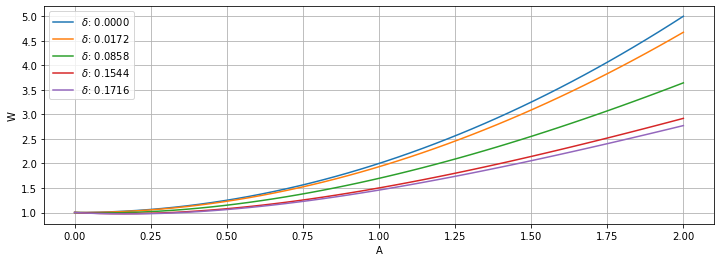

In [70]:
_ = plt.figure(figsize=(12, 4))
x =np.linspace(0,2)
for delta in np.array([0, .1, .5, .9, 1])*delta_max:
    y = (x**2+1)/((1+delta*x)**2)
    plt.plot(x,y, label=r"$\delta$" f": {delta:.4f}")
plt.grid()
plt.ylabel("W")
plt.xlabel("A")
plt.legend()
plt.show()

In [72]:
with open('../turing_Brusselator.npy', 'wb') as f:
    np.save(f, sol)
    
with open('../turing_t_Brusselator.npy', 'wb') as f:
    np.save(f, t)

In [160]:
n = (32, 32)
L = (.05, .05)



D_u = .001
D_v = .020
print(D_u/D_v)
A = 2

B = 3
Ds = np.array([D_u, D_v])


c0 = np.random.normal(scale=.1, size=(2, n[0], n[1]))
c0[0, :,:] += A
c0[1, :,:] += B/A
#c0 = data[:, :, :, 0]

f_args = (A, B)
t = np.linspace(0, 100, 20)

dt = 0.01

sol = integrate(c0, t, dt, n, L, Ds, Brusselator, f_args)

0.05


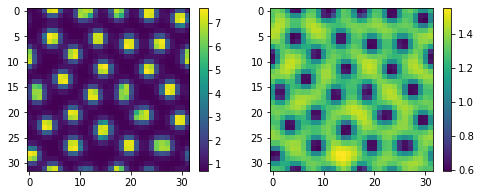

In [161]:
index =-1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(sol[0,:,:, index])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, index])
plt.colorbar(shrink=.75)
plt.show()

In [166]:
n = (64, 64)
L = (.02, .02)



D_u = .001
D_v = .002
print(D_u/D_v)
A = 3.508771929824561

B = 12.13032581453634
Ds = np.array([D_u, D_v])


c0 = np.random.normal(scale=.1, size=(2, n[0], n[1]))
c0[0, :,:] += A
c0[1, :,:] += B/A
#c0 = data[:, :, :, 0]

f_args = (A, B)
t = np.linspace(0, 100, 20)

dt = 0.01

sol = integrate(c0, t, dt, n, L, Ds, Brusselator, f_args)

0.5


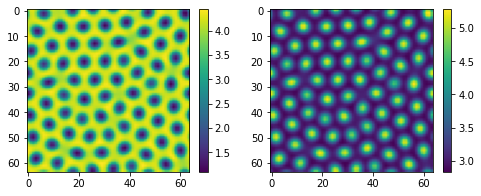

In [167]:
index =-1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(sol[0,:,:, index])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, index])
plt.colorbar(shrink=.75)
plt.show()

In [252]:
n = (64, 64)
L = (.01, .01)



D_u = .001
D_v = 1/800#.002
print(D_u/D_v)
A = 10#9.002250562640661

B = 100#81.9704926231558
Ds = np.array([D_u, D_v])
print(Ds)

c0 = np.random.normal(scale=.1, size=(2, n[0], n[1]))
c0[0, :,:] += A
c0[1, :,:] += B/A
#c0 = data[:, :, :, 0]

f_args = (A, B)
t = np.linspace(0, 100, 20)

dt = 0.01

sol = integrate(c0, t, dt, n, L, Ds, Brusselator, f_args)

0.8
[0.001   0.00125]


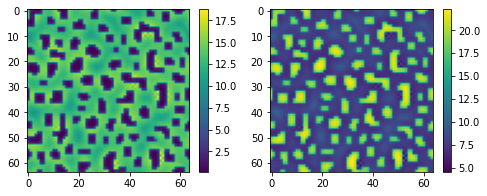

In [253]:
index =-1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(sol[0,:,:, index])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, index])
plt.colorbar(shrink=.75)
plt.show()

# Brusselator model

> The equations are as follows

<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + A - (B+1)u + u^2v$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + Bu - u^2 v$</center></h3>

With parameters  :
- $D_u = 0.001, \quad D_v=1/900=0.00111111$
- $A = 20$
- $B = 400$
- $n = (100, 100)$
- $L = (0.005, 0.005)$
- $dt = 10^{-4}$

In [351]:
n = (100, 100)
L = (.005, .005)

D_u = .001
D_v = 1/900#.002
print(D_u/D_v)
A = 20#9.002250562640661

B = 400#81.9704926231558
Ds = np.array([D_u, D_v])
print(Ds)

c0 = np.random.normal(scale=.1, size=(2, n[0], n[1]))
c0[0, :,:] += A
c0[1, :,:] += B/A
#c0 = data[:, :, :, 0]

f_args = (A, B)
t = np.linspace(0, 100, 20000)

dt = 0.0001

sol = integrate(c0, t, dt, n, L, Ds, Brusselator, f_args)

0.9
[0.001      0.00111111]


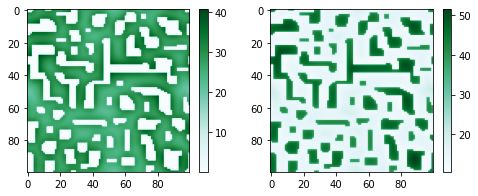

In [352]:
index =-1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(sol[0,:,:, index], cmap='BuGn')
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, index], cmap='BuGn')
plt.colorbar(shrink=.75)
plt.show()

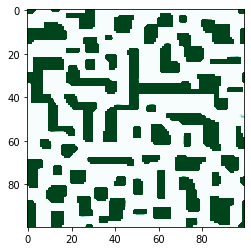

In [380]:
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

fig = plt.figure()

im = plt.imshow(sol[1, :,:,0], cmap='BuGn')#, alpha=0.8)#  ,interpolation='none')
step = 20
init_len = 200
def init():
    im.set_data(sol[1, :,:,0])
    return [im]
   
def animate(i):    
    a=im.get_array()
    if i < init_len:
        a=sol[1, :,:,i] 
        im.set_array(sol[1, :,:,i] )
    else:
        a=sol[1, :,:,(i-init_len+1)*step-1] 
        im.set_array(sol[1, :,:,(i-init_len+1)*step-1] )            
    return [im]

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=(len(t)//step)+init_len, interval=200, blit=True)


#anim.save('Brusselator.gif', writer='imagemagick')
writergif = PillowWriter(fps=10) 
anim.save('Brusselator.gif', writer=writergif, dpi=150)

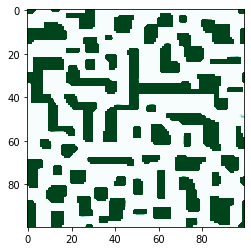

In [400]:
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

fig = plt.figure()

im = plt.imshow(sol[1, :,:,0], cmap='BuGn')#, alpha=0.8)#  ,interpolation='none')

def init():
    im.set_data(sol[1, :,:,0])
    return [im]
   
def animate(i):    
    a=im.get_array()
    a=sol[1, :,:,i] 
    im.set_array(sol[1, :,:,i] )       
    return [im]

anim = FuncAnimation(fig, animate, init_func=init,
                     frames=8000, interval=1, blit=True)
                               #frames=len(t)//2, interval=1, blit=True)


#anim.save('Brusselator.gif', writer='imagemagick')
writergif = PillowWriter(fps=10) 
anim.save('Brusselator2.gif', writer=writergif, dpi=100)